# ASX Top 10 Stocks Analysis

This is a computer project for the 10 largest companies listed on the Australian Stock Exchange (ASX) by market capitalisation. Data used are the respective stock prices from 1 July 2022 to 30 June 2024 (inclusive). Note that the stock prices are end-of-day prices, adjusted to exclude the impact of corporate events (like payments of dividends) which affect the stated share price but do not reflect trading activity.

In [551]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load the stock data
stock_prices = pd.read_csv('project_data.csv', index_col='Date')

## Mean and Covariance Matrix for the Returns

In [541]:
# Calculate returns
returns = (stock_prices/stock_prices.shift(1) - 1)

# Delete the first entry
returns = returns[1:]

# Calculate the mean returns
mean_returns = returns.mean() 

# Scale the mean returns by 10^4 and Round the mean returns to 6 decimal places
mean_returns_rounded = np.round(mean_returns * 1e4, 6)

# Display the result
mean_returns_rounded


BHP    5.290008
CBA    8.938058
CSL    2.944353
NAB    8.256029
WBC     9.73633
ANZ    8.275672
MQG     6.86245
WES   10.766101
GMG   14.718807
FMG   10.636958
dtype: float64

In [542]:
# Calculate covariance matrix
cov_returns = returns.cov()

# Round the covariance matrix to 6 decimal places
cov_returns_rounded = np.round(cov_returns * 1e4, 6)

# Display the result
cov_returns_rounded

,BHP,CBA,CSL,NAB,WBC,ANZ,MQG,WES,GMG,FMG
BHP,2.243459,0.376675,0.042792,0.353725,0.358796,0.335386,0.740294,0.457155,0.523695,2.304875
CBA,0.376675,1.062646,0.406389,0.908141,0.898814,0.798983,0.772645,0.629281,0.746455,0.402016
CSL,0.042792,0.406389,1.227458,0.310739,0.288,0.28936,0.449836,0.507921,0.643048,0.049947
NAB,0.353725,0.908141,0.310739,1.204477,0.990953,0.885234,0.814776,0.585715,0.655586,0.404997
WBC,0.358796,0.898814,0.288,0.990953,1.257145,0.950312,0.786262,0.614821,0.663644,0.439727
ANZ,0.335386,0.798983,0.28936,0.885234,0.950312,1.15359,0.776328,0.58299,0.682215,0.425117
MQG,0.740294,0.772645,0.449836,0.814776,0.786262,0.776328,1.849415,0.857739,1.127552,0.963963
WES,0.457155,0.629281,0.507921,0.585715,0.614821,0.58299,0.857739,1.353972,1.133071,0.480284
GMG,0.523695,0.746455,0.643048,0.655586,0.663644,0.682215,1.127552,1.133071,2.786472,0.746019
FMG,2.304875,0.402016,0.049947,0.404997,0.439727,0.425117,0.963963,0.480284,0.746019,4.295606


## The optimal portfolio x(t) for investors with risk-aversion parameter t and assets that will never be short-sold by risk-averse investors

In [543]:
stock_names = ['BHP', 'CBA', 'CSL', 'NAB', 'WBC', 'ANZ', 'MQG', 'WES', 'GMG', 'FMG']

# Calculate constants
e = np.ones(len(mean_returns))
inv_cov = np.linalg.inv(cov_returns)

a = e.T @ inv_cov @ e
b = mean_returns.T @ inv_cov @ e
c = mean_returns.T @ inv_cov @ mean_returns
d = a * c - b ** 2

# Define alpha and beta vectors
alpha = (1 / a) * (inv_cov @ e)
beta = inv_cov @ mean_returns - (b / a) * (inv_cov @ e)

# Determine which assets will never be short-sold by risk-averse investors
never_short_sold = ["Yes" if alpha[i] >= 0 and beta[i] >= 0 else "No" for i in range(len(stock_names))]

# Create a DataFrame to display each stock with its respective alpha and beta coefficients and short-sell status
df_optimal_portfolio = pd.DataFrame({
    'Stock': stock_names,
    'Weight Formula': [f"{alpha[i]:.6f} + {beta[i]:.6f} * t" for i in range(len(stock_names))],
    'Never Short-Sold': never_short_sold
})

df_optimal_portfolio


,Stock,Weight Formula,Never Short-Sold
0,BHP,0.208331 + -4.026365 * t,No
1,CBA,0.063196 + 2.698738 * t,Yes
2,CSL,0.358783 + -5.554370 * t,No
3,NAB,0.106148 + -1.546207 * t,No
4,WBC,0.049362 + 3.301200 * t,Yes
5,ANZ,0.199936 + -1.792496 * t,No
6,MQG,-0.054927 + -2.822930 * t,No
7,WES,0.116310 + 3.656494 * t,Yes
8,GMG,-0.033419 + 3.409902 * t,No
9,FMG,-0.013722 + 2.676035 * t,No


Hence, CBA, WBC, WES will never be short-sold by risk-averse investors for any risk aversion parameter t > 0 because they have positive alpha and beta in the optimal portfolio.

### Optimal Investment Allocation, Mean Return, and Risk (Considering a specific investor with risk aversion parameter t= 0.06 who wants to invest $100,000 in these assets.)

In [544]:
investment_amount = 100000
t = 0.06

e = np.ones(len(mean_returns))
inv_cov = np.linalg.inv(cov_returns)

a = e.T @ inv_cov @ e
b = mean_returns.T @ inv_cov @ e
c = mean_returns.T @ inv_cov @ mean_returns
d = a * c - b ** 2

# Compute alpha and beta vectors
alpha = (1 / a) * (inv_cov @ e)
beta = inv_cov @ mean_returns - (b / a) * (inv_cov @ e)

# Optimal portfolio weights for t = 0.06
optimal_weights = alpha + t * beta

# Convert weights to dollar allocation
optimal_allocation = optimal_weights * investment_amount

# Calculate portfolio mean return and variance
mean_portfolio_return_3a = optimal_weights.T @ mean_returns
variance_portfolio_return_3a = optimal_weights.T @ cov_returns @ optimal_weights
std_dev_portfolio_return_3a = np.sqrt(variance_portfolio_return_3a)

# Stock names in order
stock_names = ['BHP', 'CBA', 'CSL', 'NAB', 'WBC', 
               'ANZ', 'MQG', 'WES', 'GMG', 'FMG']

# Round investment allocation to nearest dollar
optimal_allocation_rounded =  np.round(optimal_allocation).astype(int)


# Create a DataFrame with stock names and weights
optimal_allocation_df = pd.DataFrame({
    'Stock': stock_names,
    'Optimal weights': optimal_weights,
    'Optimal investment allocation': optimal_allocation_rounded
})


# Display results
print("Mean Portfolio Return ($):", mean_portfolio_return_3a * investment_amount)
print("Portfolio Risk (Standard Deviation in $):", 
      std_dev_portfolio_return_3a * investment_amount)
optimal_allocation_df

Mean Portfolio Return ($): 113.51822110611054
Portfolio Risk (Standard Deviation in $): 956.5593453532547


,Stock,Optimal weights,Optimal investment allocation
0,BHP,-0.033250781476311136,-3325
1,CBA,0.2251206081437312,22512
2,CSL,0.02552092066621381,2552
3,NAB,0.013375988843788544,1338
4,WBC,0.24743401695645717,24743
5,ANZ,0.09238640104614165,9239
6,MQG,-0.22430275684590384,-22430
7,WES,0.33569988960576763,33570
8,GMG,0.17117529708994672,17118
9,FMG,0.14684041597016836,14684


### Optimal Portfolio without Short-Selling (Using SciPy Minimize)


In [549]:
total_investment = 100000
t = 0.06
e = np.ones(len(mean_returns))

def objective(weights):
    return 0.5 * np.dot(weights.T, np.dot(cov_returns, weights)) - t * np.dot(mean_returns, weights)

constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
bounds = [(0, None)] * 10

result = minimize(objective, x0=np.ones(len(mean_returns)) / len(mean_returns), 
                  constraints=constraints, bounds=bounds, tol=1e-15)

# Optimal weights and scaling by total investment
optimal_weights = result.x
optimal_investment_allocation = np.round(optimal_weights * total_investment).astype(int)

# Create a DataFrame with stock names and optimal portfolio
df_optimal_allocation = pd.DataFrame({
    'Stock': stock_names,
    'Optimal Investment Allocation ($)': optimal_investment_allocation
})

# Calculate portfolio mean return and risk
mean_portfolio_return = np.dot(optimal_weights, mean_returns) * total_investment
portfolio_variance = np.dot(optimal_weights.T, np.dot(cov_returns, optimal_weights))
portfolio_risk = np.sqrt(portfolio_variance) * total_investment

print("\nMean Return of Portfolio ($):", round(mean_portfolio_return, 2))
print("Portfolio Risk (Standard Deviation) ($):", round(portfolio_risk, 2))
df_optimal_allocation


Mean Return of Portfolio ($): 104.99
Portfolio Risk (Standard Deviation) ($): 929.22


,Stock,Optimal Investment Allocation ($)
0,BHP,0
1,CBA,18202
2,CSL,1439
3,NAB,0
4,WBC,23387
5,ANZ,4926
6,MQG,0
7,WES,27865
8,GMG,14044
9,FMG,10137


## Graphical Representation of the Optimal Investment Allocation

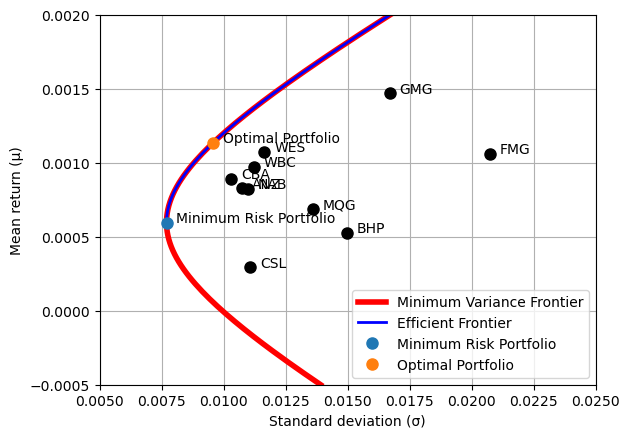

In [528]:
# Minimum Variance Portfolio (MVP) Calculation
def f(x):
    return x @ (cov_returns @ x)

# Constraint: Sum of weights equals 1
def c(x):
    return np.sum(x) - 1

cons = [{'type': 'eq', 'fun': c}]
bounds = [(None, None)] * 10
initial_guess = np.ones(len(mean_returns)) / len(mean_returns)

# Solve for Minimum Variance Portfolio (MVP)
soln = minimize(f, initial_guess, constraints=cons, tol=1e-15, bounds=bounds)
x_MVP = soln.x

# Generate Minimum Variance Frontier (MVF)
def minimum_variance_frontier(num_points=100):
    close_range = np.linspace(mean_returns @ x_MVP - 1e-5, mean_returns @ x_MVP + 1e-5, 50)
    target_returns = np.sort(np.append(np.linspace(-0.0005, 0.002, num_points), close_range))
    mvf_risks = []
    
    for target_return in target_returns:
        constraints = [
            {'type': 'eq', 'fun': c},
            {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}
        ]
        result = minimize(f, initial_guess, bounds=bounds, constraints=constraints, tol=1e-15)
        
        if result.success:
            mvf_risks.append(np.sqrt(result.fun))
        else:
            mvf_risks.append(np.nan)

    return mvf_risks, target_returns

# Calculate MVF and EF (Efficient Frontier)
mvf_risks, target_returns = minimum_variance_frontier()
mvp_index = np.argmin(np.abs(target_returns - (mean_returns @ x_MVP)))
ef_risks = mvf_risks[mvp_index:]
ef_returns = target_returns[mvp_index:]

# Plot all stocks with individual risk and return
for i in range(len(mean_returns)):
    plt.plot(np.sqrt(cov_returns.iloc[i, i]), mean_returns[i], 'o', color='k', markersize=8)
    plt.text(np.sqrt(cov_returns.iloc[i, i]) + 0.0004, mean_returns[i], mean_returns.index[i])

# Plot the MVF and EF
plt.plot(mvf_risks, target_returns, linestyle='-', color='red', linewidth=4, label='Minimum Variance Frontier')
plt.plot(ef_risks, ef_returns, linestyle='-', color='blue', linewidth=2, label='Efficient Frontier')

# Plot the MVP point
plt.plot(np.sqrt(x_MVP @ cov_returns @ x_MVP), mean_returns @ x_MVP, 'o', markersize=8, label='Minimum Risk Portfolio')
plt.text(np.sqrt(x_MVP @ cov_returns @ x_MVP) + 0.0004, mean_returns @ x_MVP, 'Minimum Risk Portfolio')

# Plot the optimal portfolio from Question 3(a)
plt.plot(std_dev_portfolio_return_3a, mean_portfolio_return_3a, 'o', markersize=8, label='Optimal Portfolio')
plt.text(std_dev_portfolio_return_3a + 0.0004, mean_portfolio_return_3a, 'Optimal Portfolio')

# Plotting details
plt.xlabel("Standard deviation (σ)")
plt.ylabel("Mean return (μ)")
plt.xlim(0.005, 0.025)  # Adjust x-axis range if needed
plt.ylim(-0.0005, 0.002)  # Adjust y-axis range if needed
plt.legend()
plt.grid(True)
plt.show()

## New Optimal Portfolio with Short Selling Allowed (with 0.00015 risk free rate)

In [536]:
import numpy as np

# Parameters
investment_amount = 100000
t = 0.06
risk_free_rate = 0.00015

e = np.ones(len(mean_returns))
inv_cov = np.linalg.inv(cov_returns)

# Calculate a, b, c, and d
a = e.T @ inv_cov @ e
b = mean_returns.T @ inv_cov @ e
c = mean_returns.T @ inv_cov @ mean_returns
d = a * c - b ** 2

# Compute the Market Portfolio weights
market_weights = inv_cov @ (mean_returns - risk_free_rate * e)
market_weights /= np.sum(market_weights)

# Calculate expected return and standard deviation of the Market Portfolio
market_return = np.dot(market_weights, mean_returns)
market_risk = np.sqrt(market_weights @ cov_returns @ market_weights)

# Calculate the weight of the Market Portfolio in the optimal portfolio with risk-free asset
allocation_to_market = t * (market_return - risk_free_rate) / (market_risk ** 2)

# Calculate the overall mean return and risk of the optimal portfolio
optimal_portfolio_mean_return = risk_free_rate + allocation_to_market * (market_return - risk_free_rate)
optimal_portfolio_std_dev = allocation_to_market * market_risk

# Convert the Market Portfolio allocation to dollar values for each stock
optimal_market_allocation = (market_weights * allocation_to_market * investment_amount).astype(int)

# Create a DataFrame with stock names and allocations in the Market Portfolio
optimal_allocation_df = pd.DataFrame({
    'Stock': stock_names,
    'Market Weights': market_weights,
    'Dollar Allocation in Market Portfolio': optimal_market_allocation
})

# Display results
print("Portfolio Type:", "Borrowing" if allocation_to_market > 1 else "Lending")

optimal_allocation_df


Portfolio Type: Lending


,Stock,Market Weights,Dollar Allocation in Market Portfolio
0,BHP,-0.32485024818003927,-14718
1,CBA,0.42057000146709483,19055
2,CSL,-0.3767404933439203,-17069
3,NAB,-0.09860422252217994,-4467
4,WBC,0.4865151942012261,22043
5,ANZ,-0.03743064575179352,-1695
6,MQG,-0.42874645164350117,-19426
7,WES,0.6005123178876409,27208
8,GMG,0.418128943473289,18945
9,FMG,0.3406456044121834,15434


## New Plot of the Optimal Investment Allocation

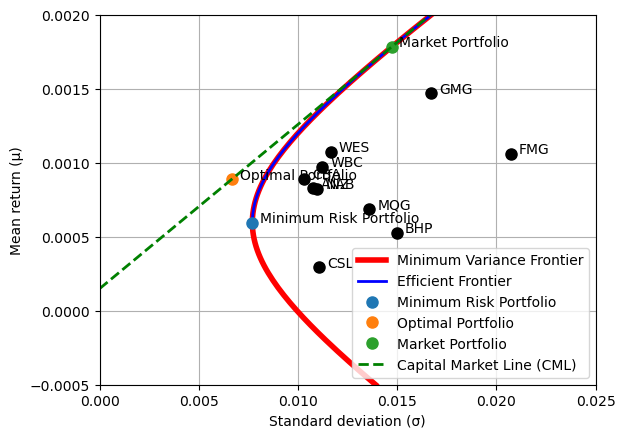

In [537]:
# Define risk-free rate and the function for Z(x)
risk_free_rate = 0.00015  # Annualized risk-free return in decimal form

# Minimum Variance Portfolio (MVP) Calculation
def f(x):
    return x @ (cov_returns @ x)

# Constraint: Sum of weights equals 1
def c(x):
    return np.sum(x) - 1

cons = [{'type': 'eq', 'fun': c}]
bounds = [(None, None)] * 10
initial_guess = np.ones(len(mean_returns)) / len(mean_returns)

# Solve for Minimum Variance Portfolio (MVP)
soln = minimize(f, initial_guess, constraints=cons, tol=1e-15, bounds=bounds)
x_MVP = soln.x

# Generate Minimum Variance Frontier (MVF)
def minimum_variance_frontier(num_points=100):
    close_range = np.linspace(mean_returns @ x_MVP - 1e-5, mean_returns @ x_MVP + 1e-5, 50)
    target_returns = np.sort(np.append(np.linspace(-0.0005, 0.002, num_points), close_range))
    mvf_risks = []
    
    for target_return in target_returns:
        constraints = [
            {'type': 'eq', 'fun': c},
            {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}
        ]
        result = minimize(f, initial_guess, bounds=bounds, constraints=constraints, tol=1e-15)
        
        if result.success:
            mvf_risks.append(np.sqrt(result.fun))
        else:
            mvf_risks.append(np.nan)

    return mvf_risks, target_returns

# Calculate MVF and EF (Efficient Frontier)
mvf_risks, target_returns = minimum_variance_frontier()
mvp_index = np.argmin(np.abs(target_returns - (mean_returns @ x_MVP)))
ef_risks = mvf_risks[mvp_index:]
ef_returns = target_returns[mvp_index:]

# Plot all stocks with individual risk and return
for i in range(len(mean_returns)):
    plt.plot(np.sqrt(cov_returns.iloc[i, i]), mean_returns[i], 'o', color='k', markersize=8)
    plt.text(np.sqrt(cov_returns.iloc[i, i]) + 0.0004, mean_returns[i], mean_returns.index[i])

# Plot the MVF and EF
plt.plot(mvf_risks, target_returns, linestyle='-', color='red', linewidth=4, label='Minimum Variance Frontier')
plt.plot(ef_risks, ef_returns, linestyle='-', color='blue', linewidth=2, label='Efficient Frontier')

# Plot the MVP point
plt.plot(np.sqrt(x_MVP @ cov_returns @ x_MVP), mean_returns @ x_MVP, 'o', markersize=8, label='Minimum Risk Portfolio')
plt.text(np.sqrt(x_MVP @ cov_returns @ x_MVP) + 0.0004, mean_returns @ x_MVP, 'Minimum Risk Portfolio')

# Plot the optimal portfolio from Question 3(a)
plt.plot(optimal_portfolio_std_dev, optimal_portfolio_mean_return, 'o', markersize=8, label='Optimal Portfolio')
plt.text(optimal_portfolio_std_dev + 0.0004, optimal_portfolio_mean_return, 'Optimal Portfolio')

# Calculate the Market Portfolio
market_weights = (mean_returns - risk_free_rate) @ np.linalg.inv(cov_returns)
market_weights /= np.sum(market_weights)  # Normalize weights to sum to 1

market_return = np.dot(market_weights, mean_returns)
market_risk = np.sqrt(market_weights @ cov_returns @ market_weights)

# Plot the Market Portfolio
plt.plot(market_risk, market_return, 'o', markersize=8, label='Market Portfolio')
plt.text(market_risk + 0.0004, market_return, 'Market Portfolio')

# Plot the Capital Market Line (CML)
cml_x = np.linspace(0, 0.025, 100)
cml_y = risk_free_rate + (market_return - risk_free_rate) * (cml_x / market_risk)

plt.plot(cml_x, cml_y, linestyle='--', color='green', linewidth=2, label='Capital Market Line (CML)')

# Plotting details
plt.xlabel("Standard deviation (σ)")
plt.ylabel("Mean return (μ)")
plt.xlim(0, 0.025)  # Adjust x-axis range if needed
plt.ylim(-0.0005, 0.002)  # Adjust y-axis range if needed
plt.legend()
plt.grid(True)
plt.show()


## Betas of the 10 Underlying Stocks

In [538]:
# Define market portfolio for the 10 stocks (from the question)
market_portfolio = np.array([0.191, 0.187, 0.116, 0.095, 0.088, 
                           0.075, 0.072, 0.065, 0.06, 0.051])

# Calculate returns
returns = (stock_prices/stock_prices.shift(1) - 1)

# Calculate the market return as a weighted sum of individual stock returns
returns['Market'] = np.dot(returns, market_portfolio)

# Calculate the covariance matrix
cov_returns = returns.cov()

# Calculate the betas of all stocks
sigmasq_market = cov_returns['Market']['Market']
betas = cov_returns['Market'] / sigmasq_market

# Convert to a DataFrame with specified column names
betas_df = betas.reset_index()
betas_df.columns = ['Stock', 'Beta']

# Display the betas without Market
betas_df[:-1]

,Stock,Beta
0,BHP,1.1470466575937106
1,CBA,0.9786401364392647
2,CSL,0.5687224734712737
3,NAB,0.9692816513670639
4,WBC,0.9785849142113648
5,ANZ,0.9130627297865221
6,MQG,1.178125331417831
7,WES,0.9157627973968016
8,GMG,1.1746757640906094
9,FMG,1.3809703992160307


## Differences in Betas of CSL and MQG

CSL has a lower beta ~0.569 beacause it is a biotechnology company, which is less sensitive to market fluctuations since people still spend money on medicines and vaccines. This results in lower covariance with the market portfolio, reduing its beta. In contrast, MQG has a higher beta of ~1.18 because it is an investment bank whose revenues and profits are more sensitive to the overall market performance since it is easier to make money trading when there is a lot of business activity. This leads to a higher covariance, increasing its beta. 